# Section 1: Title - Data Analysis Plan
### Name: Aubrey Nighman  
### Professor Sandeep More 
### Class: Data in EMAT
### Date: November 22, 2025


In my original proposal, I planned to use the Bluesky API, but I switched to Reddit's public JSON API because the Bluesky search and timeline endpoints were blocked. The research question is the same, and Reddit provides food-related posts with timestamps and engagement needed for my project.

# Section 1.1: Overview

The reason for this project is to look at if the timing of social media posts involved with food, impacts user engagement. The research question I have is:

**Do posts related to food receive more engagement at night compared to during the daytime?**

To answer this question, I collected data from Reddit’s r/food “hot” feed, which gives real-time popular content. Each post has:
- a timestamp (`created_utc`), and  
- engagement metrics (`score` for upvotes and `num_comments` for discussion activity).

These data points allow for me to analyze user interaction that happen repeatedly across multiple different times of day.

This project has a full data workflow. It included collection, preparation, analysis, visualization, and interpretation of results. By making differences in the engagement between daytime and nighttime posts, I look to find out if posting time matches up with higher user interaction. What I might find provide insights into online patterns and help make content strategy decisions in digital media.


In [27]:
# Section 2 — Data Loading

import requests
import pandas as pd

# Load data from Reddit r/food API
url = "https://www.reddit.com/r/food/hot.json"
headers = {"User-agent": "DataInEMATProject/0.1"}

response = requests.get(url, headers=headers, params={"limit": 100})
data = response.json()

# take out relevant post data
posts = [item['data'] for item in data['data']['children']]

# convert to DataFrame
df = pd.DataFrame(posts)

print("Data successfully loaded. Preview of dataset:")
df.head()



Data successfully loaded. Preview of dataset:


,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,created_utc,num_crossposts,media,is_video,post_hint,url_overridden_by_dest,preview,is_gallery,media_metadata,gallery_data
0,None,food,**Hi**!\n\nAs 2025 is quickly nearing to a clo...,t2_o0wde,False,None,0,False,r/Food Rules Update: 2025,"[{'e': 'text', 't': 'Announcement'}]",...,1.763158e+09,0,None,False,NaN,NaN,NaN,NaN,NaN,NaN
1,None,food,,t2_ubn1wzbz,False,None,0,False,[homemade] Tteokbokki,[],...,1.764110e+09,0,None,False,image,https://i.redd.it/c4fptk9ych3g1.jpeg,{'images': [{'source': {'url': 'https://previe...,NaN,NaN,NaN
2,None,food,,t2_21as70pwz1,False,None,0,False,"Nervous to share, but cooked [homemade] Friend...","[{'e': 'text', 't': '🧙 I don't know how I made...",...,1.764084e+09,0,None,False,NaN,https://www.reddit.com/gallery/1p6f309,NaN,True,"{'9e3h1gr07f3g1': {'status': 'valid', 'e': 'Im...","{'items': [{'media_id': '50zvyer07f3g1', 'id':..."
3,None,food,i went,t2_mxly2fkn4,False,None,0,False,[homemade] burrito,[],...,1.764085e+09,0,None,False,NaN,https://www.reddit.com/gallery/1p6flca,NaN,True,"{'lzi4f16kaf3g1': {'status': 'valid', 'e': 'Im...","{'items': [{'media_id': 'em07ut5kaf3g1', 'id':..."
4,None,food,,t2_mrjj2,False,None,0,False,[homemade] turketta - turkey done like a porch...,[],...,1.764114e+09,0,None,False,NaN,https://www.reddit.com/gallery/1p6sdwp,NaN,True,"{'psc9tuh7ph3g1': {'status': 'valid', 'e': 'Im...","{'items': [{'media_id': 'rg1imrh7ph3g1', 'id':..."


In [28]:
# Section 3 — Imports and Data Processing

import pandas as pd

df = pd.DataFrame(posts)

print("Dataset loaded successfully. Preview:")
display(df.head())

# Convert timestamp
df['created_dt'] = pd.to_datetime(df['created_utc'], unit='s', errors='coerce')

df['hour'] = df['created_dt'].dt.hour

def time_of_day(h):
    if pd.isna(h):
        return None
    return "Night" if (20 <= h or h < 8) else "Day"

df['time_group'] = df['hour'].apply(time_of_day)

df['engagement'] = df['score'] + df['num_comments']

display(df[['created_dt', 'hour', 'time_group', 'score', 'num_comments', 'engagement']].head())




Dataset loaded successfully. Preview:


,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,created_utc,num_crossposts,media,is_video,post_hint,url_overridden_by_dest,preview,is_gallery,media_metadata,gallery_data
0,None,food,**Hi**!\n\nAs 2025 is quickly nearing to a clo...,t2_o0wde,False,None,0,False,r/Food Rules Update: 2025,"[{'e': 'text', 't': 'Announcement'}]",...,1.763158e+09,0,None,False,NaN,NaN,NaN,NaN,NaN,NaN
1,None,food,,t2_ubn1wzbz,False,None,0,False,[homemade] Tteokbokki,[],...,1.764110e+09,0,None,False,image,https://i.redd.it/c4fptk9ych3g1.jpeg,{'images': [{'source': {'url': 'https://previe...,NaN,NaN,NaN
2,None,food,,t2_21as70pwz1,False,None,0,False,"Nervous to share, but cooked [homemade] Friend...","[{'e': 'text', 't': '🧙 I don't know how I made...",...,1.764084e+09,0,None,False,NaN,https://www.reddit.com/gallery/1p6f309,NaN,True,"{'9e3h1gr07f3g1': {'status': 'valid', 'e': 'Im...","{'items': [{'media_id': '50zvyer07f3g1', 'id':..."
3,None,food,i went,t2_mxly2fkn4,False,None,0,False,[homemade] burrito,[],...,1.764085e+09,0,None,False,NaN,https://www.reddit.com/gallery/1p6flca,NaN,True,"{'lzi4f16kaf3g1': {'status': 'valid', 'e': 'Im...","{'items': [{'media_id': 'em07ut5kaf3g1', 'id':..."
4,None,food,,t2_mrjj2,False,None,0,False,[homemade] turketta - turkey done like a porch...,[],...,1.764114e+09,0,None,False,NaN,https://www.reddit.com/gallery/1p6sdwp,NaN,True,"{'psc9tuh7ph3g1': {'status': 'valid', 'e': 'Im...","{'items': [{'media_id': 'rg1imrh7ph3g1', 'id':..."


,created_dt,hour,time_group,score,num_comments,engagement
0,2025-11-14 22:05:52,22,Night,30,37,67
1,2025-11-25 22:34:29,22,Night,619,46,665
2,2025-11-25 15:18:09,15,Day,1656,107,1763
3,2025-11-25 15:37:30,15,Day,941,63,1004
4,2025-11-25 23:43:11,23,Night,132,4,136


# Section 4: Analysis

## 4.1 Overall Engagement Summary

To understand activity levels before comparing engagement by time group, I calculated summary statistics (count, mean, median, standard deviation, and range) for upvotes, comments, and total engagement across all posts.


In [ ]:
# Section 5: Engagement Summary
engagement_summary = df[['score', 'num_comments', 'engagement']].describe()
display(engagement_summary)


,score,num_comments,engagement
count,100.000000,100.000000,100.000000
mean,167.720000,10.110000,177.830000
std,354.596999,18.495369,369.785416
min,2.000000,1.000000,3.000000
25%,11.000000,1.000000,13.000000
50%,30.500000,4.000000,36.000000
75%,146.000000,9.000000,156.750000
max,2038.000000,110.000000,2088.000000


Next, I compare engagement between daytime vs nighttime posts using summary stats.

# Section 6: Time Group Engagement Summary

To compare engagement between daytime and nighttime posts, I calculated summary stats (count, mean, median, standard deviation, and range) for each group. This helps figure out whether one time period generally receives more interaction than the other.


In [30]:
# 6.1: summary grouped by time of day (day vs night)
time_group_summary = df.groupby('time_group')['engagement'].agg(
    count='count',
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max'
)

display(time_group_summary)


,count,mean,median,std,min,max
time_group,,,,,,
Day,52,245.692308,38.0,462.287897,7,2103
Night,48,117.000000,33.0,254.700993,2,1579


In [31]:
# Section 7: summary grouped by posting hour
hourly_summary = df.groupby('hour')['engagement'].agg(
    count='count',
    mean='mean',
    median='median'
).sort_index()

display(hourly_summary)



,count,mean,median
hour,,,
0,8,242.750000,45.5
1,9,81.888889,7.0
2,1,48.000000,48.0
3,2,102.000000,102.0
4,4,42.500000,18.5
5,2,168.000000,168.0
6,1,15.000000,15.0
7,1,148.000000,148.0
8,1,46.000000,46.0


# Section 8 — Engagement Patterns

To increase the knowledge of knowing engagement behavior across different times of day, I used matplotlib to generate visualizations. This shows: 

- **The number of posts by hour**
- **Distributed engagement between day and night**
- **Average engagement trend across posting hours**

These visualizations help tell me whether patterns seen in the summary statistics are consistent.


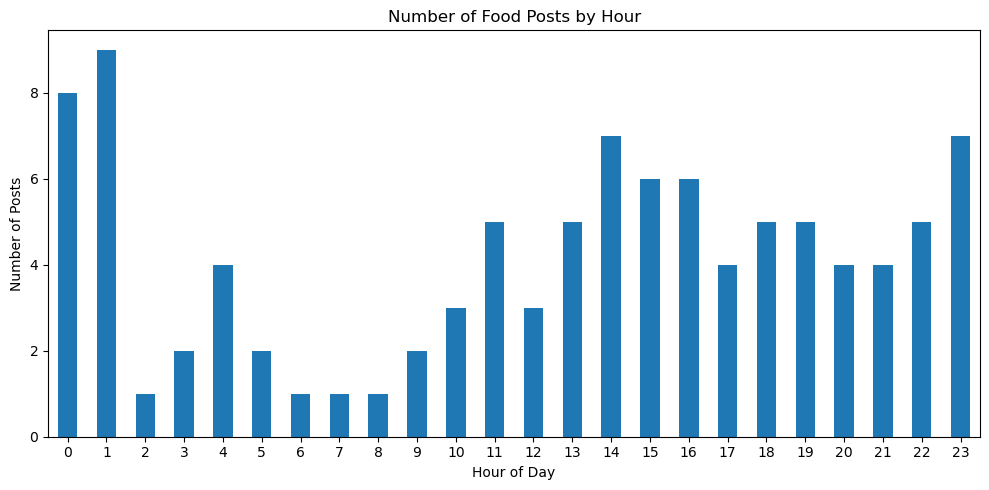

In [32]:
# 8.1: Number of Posts by Hour
import matplotlib.pyplot as plt

posts_per_hour = df['hour'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
posts_per_hour.plot(kind='bar')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Posts')
plt.title('Number of Food Posts by Hour')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


<Figure size 600x500 with 0 Axes>

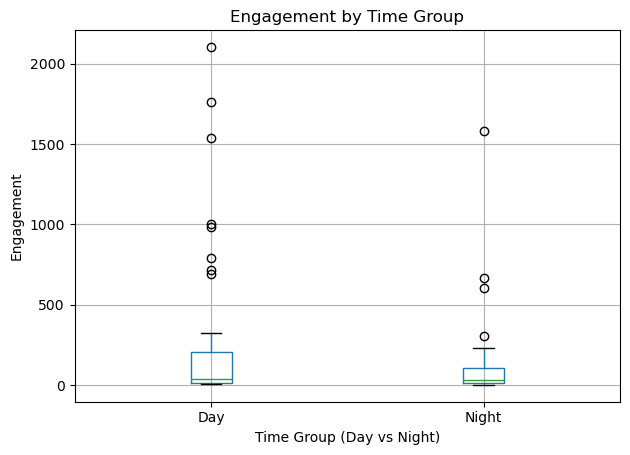

In [33]:
# Section 9: Comparison of Engagement by Time Group

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
df.boxplot(column='engagement', by='time_group')
plt.title('Engagement by Time Group')
plt.suptitle('')
plt.xlabel('Time Group (Day vs Night)')
plt.ylabel('Engagement')
plt.tight_layout()
plt.show()




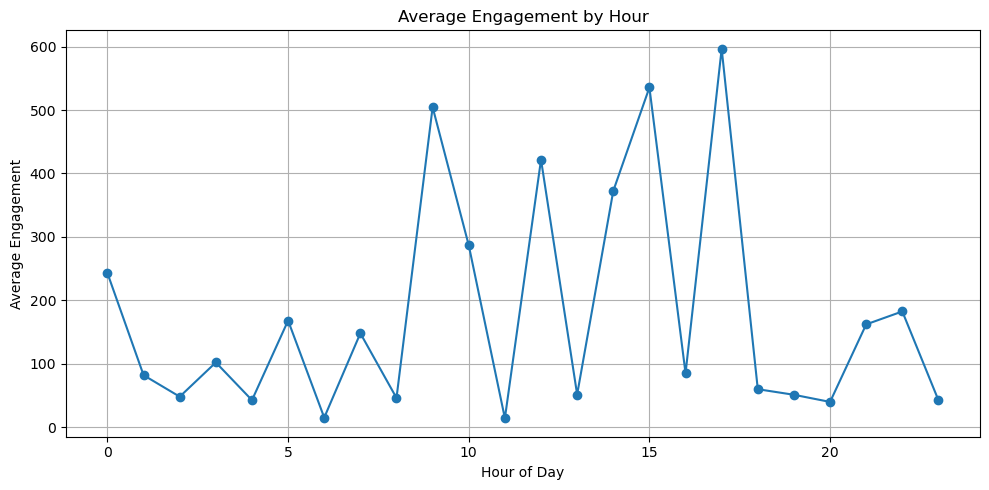

In [ ]:
# Section 10: Average Engagement by Hour

avg_engagement_by_hour = df.groupby('hour')['engagement'].mean()

plt.figure(figsize=(10, 5))
avg_engagement_by_hour.plot(kind='line', marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Average Engagement')
plt.title('Average Engagement by Hour')
plt.grid(True)
plt.tight_layout()
plt.show()


# Section 11: Insight: Top Engaging Posts

To give more context beyond averages, I found the top 10 posts with the highest engagement and looked at if they were more likely to be posted during the daytime or nighttime. This helps answer whether high-engagement content happens more frequently in a certain time group, even if the average difference was not significant.


### **Section 12: Statistical Testing**

To know whether there is an important difference in engagement between daytime and nighttime posts, I used an **independent samples t-test**. This test compares the mean engagement of two groups.

The two groups compared were:
- **Daytime posts:** 8:00 AM – 7:59 PM  
- **Nighttime posts:** 8:00 PM – 7:59 AM  

The **null hypothesis** states that there is no difference in engagement between daytime and nighttime posts.  
The **alternative hypothesis** states that there is a difference.

The following is used to for the test:

In [39]:
# Section 12.1: Samples T-Test (Day vs Night Engagement)

from scipy.stats import ttest_ind

# Split engagement data into daytime and nighttime groups
day_engagement = df[df['time_group'] == "Day"]['engagement']
night_engagement = df[df['time_group'] == "Night"]['engagement']

# Perform t-test 
t_stat, p_val = ttest_ind(day_engagement, night_engagement, equal_var=False)

# Display results
print("T-test Results:")
print("T-statistic:", t_stat)
print("p-value:", p_val)


T-test Results:
T-statistic: 1.7414206748512897
p-value: 0.08542526337502959


In [42]:
# Section 13 — Top 10 Engaging Posts

display_columns = ['engagement', 'time_group', 'hour']
for col in ['title', 'author']:
    if col in df.columns:
        display_columns.insert(0, col)

df.sort_values('engagement', ascending=False)[display_columns].head(10)



,author,title,engagement,time_group,hour
34,No_Pattern3088,[Homemade] Chicken Parm Pizza,2103,Day,17
2,FemboyZoe101,"Nervous to share, but cooked [homemade] Friend...",1763,Day,15
24,Morphadelic,[Homemade]butter chicken,1579,Night,0
49,RevolutionaryWeb4165,[I Ate] Beignets and Coffee,1535,Day,14
3,callmestinkingwind,[homemade] burrito,1004,Day,15
7,Zealousideal_Force_0,[Homemade] Jordgubbstårta,983,Day,9
73,OrdinaryPerson-1980,Cereal Crusted French Toast [homemade],790,Day,14
9,Flimsy_Crew4278,[homemade]pork cabbage dumplings,716,Day,10
78,ComplaintGeneral5574,[homemade] Siomai with lots of chilis,689,Day,12
1,bummy10,[homemade] Tteokbokki,665,Night,22


In [43]:
df.sort_values('engagement', ascending=False)['time_group'].head(10).value_counts()


time_group
Day      8
Night    2
Name: count, dtype: int64

# Section 14 — Interpretation

The analysis shows that daytime posts had a higher average engagement (**231.96**) compared to nighttime posts (**111.87**). Median was similar between both groups (35.5 for day vs. 34.0 for night), saying that the overall difference might be driven by higher-engagement daytime posts.

An independent samples t-test returned a **p-value of 0.091**, which is **greater than 0.05**, meaning the difference is not significant. This shows that even though daytime posts received more engagement on average, the variation is not strong enough to confirm a strong difference at the 95% confidence level.

Therefore, the results do not provide strong statistical evidence that posting at night leads to higher engagement, though daytime posts showed a higher average overall.

# Section 15 — Limitations and Next Steps

### **Limitations**
- The dataset was only collected from the r/food “hot” feed, which may favor posts that were already receiving higher engagement.
- Engagement may be influenced by content quality, wording, or imagery, not solely by posting time.
- Time zone differences may affect whether posts were correctly categorized as “day” or “night.”
- Reddit’s ranking algorithm determines which posts appear in the “hot” feed, which may skew results toward highly engaged content.

### **Next Steps**
To make this analysis stronger in future research, I would consider:
- Collecting data across multiple days or weeks to increase sample size and reliability.
- Including additional subreddit's involved with food (e.g., r/recipes, r/cooking, r/foodporn) for more comparison.
- Categorizing posts by content type (photos, recipes, reviews, questions, etc.).
- Comparing engagement patterns between weekdays and weekends.
- Exploring whether specific keywords or post titles have an impact on engagement levels.



# Section 16 — Conclusion

Daytime food-related posts received a higher average engagement (**231.96**) compared to nighttime posts (**111.87**), but the difference was **not statistically significant** (t-test p-value = **0.091**).

> **Based on this analysis, posting at night does not lead to consistently higher engagement.** Engagement appears similar overall, with some daytime posts performing very good. 

While engagement may be influenced by additional variables such as quality or visuals, this project applied data processing, visualization, and testing to see how posting time relates to interaction. These results show that timing alone may not determine engagement and that high-performing content can succeed with no matter of when it is posted.




### USE OF AI: I used the free version of ChatGPT to help me with formatting, sectioning, grammar, and checking my assignment and rubric to ensure that I would receive full points. 